In this document, I analyze the 'Advertising' dataset, using linear regression.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Advertising dataset

In [3]:
# Read the results file and construct X, y
df= pd.read_csv('Advertising.csv')
X_n = df['Newspaper'].values
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

### Linear regression algorithm

In [3]:
# gradient of sum of square errors:
def gradient (X, y, beta):
    return -2*X.T.dot(y - X.dot(beta))

In [4]:
# Calculate the sum of square errors:
def sum_square_errors (X, y, beta):
    n, p = X.shape
    cost = np.sum(np.square(X.dot(beta)-y))
    return cost

In [5]:
# X_n has size n*p and beta has size (p+1)*1
n, p = X_n.shape
X_n_a = np.ones((n,p+1))
X_n_a[:,1:] = X_n

In [6]:
# Initialize beta
beta = np.random.uniform (low=-1, high=1, size=(p+1,1))

# After some  experiment with different values for max_iter and learning_rate, the below combination proved to be the best:
max_iter = 100000
learning_rate = 1e-6

Cost, Iter = [], []

# Iterate and update beta by using the gradient of the SSE
for i in range (max_iter):
    # Calculate the gradient
    dbeta = gradient (X_n_a, y, beta)
    # Update beta
    beta = beta-learning_rate * dbeta
    # Calculate the value of SSE
    cost = sum_square_errors (X_n_a, y, beta)
    # Save cost of an iteration every 20-th iteration
    if i % 200 == 0:
        Cost.append (cost)
        Iter.append (i+1)

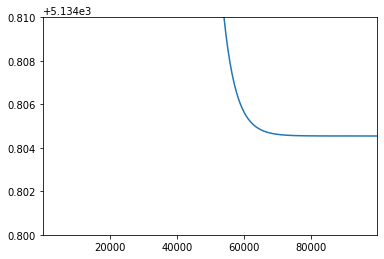

In [7]:
pd.Series (Cost, index = Iter).plot(kind = 'line', ylim = (5134.8,5134.81))

In [8]:
#The estimation of beta using gradient descent:
beta

array([[12.35138813],
       [ 0.05469351]])

In [9]:
#exact solution of beta:
np.linalg.inv(X_n_a.T@(X_n_a))@(X_n_a.T@y)

array([[12.35140707],
       [ 0.0546931 ]])

In [10]:
X_new = np.array([[0],[120]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta)h
y_predict

array([[12.35138813],
       [18.91460936]])

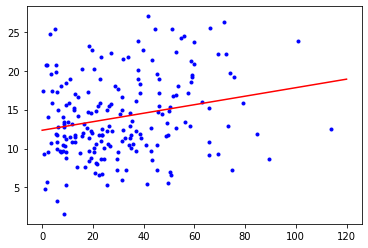

In [11]:
plt.plot(X_n,y,'b.')
plt.plot(X_new,y_predict,'r-')

In [12]:
# X has size n*p and beta has size (p+1)*1
n, p = X.shape
X_a = np.ones((n,p+1))
X_a[:,1:] = X

In [13]:
# Initialize beta
beta = np.random.uniform (low=-1, high=1, size=(p+1,1))

# After some  experiment with different values for max_iter and learning_rate, the below combination proved to be the best:
max_iter = 2000000
learning_rate = 1e-7

Cost, Iter = [], []

# Iterate and update beta by using the gradient of the SSE
for i in range (max_iter):
    # Calculate the gradient
    dbeta = gradient (X_a, y, beta)
    # Update beta
    beta = beta-learning_rate * dbeta
    # Calculate the value of SSE
    cost = sum_square_errors (X_a, y, beta)
    # Save cost of an iteration every 20-th iteration
    if i % 2000 == 0:
        Cost.append (cost)
        Iter.append (i+1)

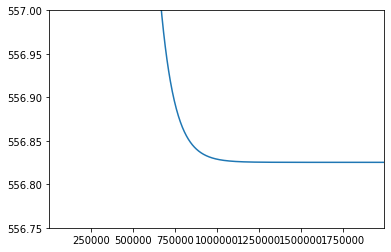

In [16]:
pd.Series (Cost, index = Iter).plot(kind = 'line', ylim = (556.75,557))

In [17]:
#The estimation of beta using gradient descent:
beta

array([[ 2.93885687e+00],
       [ 4.57647342e-02],
       [ 1.88530390e-01],
       [-1.03729563e-03]])

In [18]:
#exact solution of beta:
np.linalg.inv(X_a.T@(X_a))@(X_a.T@y)

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])